<div class='alert alert-success'>
    <h1 align="center">Local Search Algorithms: Hill Climbing for N-Queens</h1> 
    <h3 align="center">Artificial Intelligece Course (Fall 2021)</h3>
    <h5 align="center">Seyed Naser RAZAVI <a href='http://www.snrazavi.ir/ai-slides/'>(website)</a></h5>
</div>

In [1]:
import random
import matplotlib.pyplot as plt

import ipywidgets as widgets

from nqueens import NQueensState, NQueensStatePermutation

plt.rcParams['figure.figsize'] = (6, 6)

## N-Queens Problem
- **Goal**: Place N queens on a N-by-N chess board so that no two queens can attack each other.
- Thus a solution requires that no two queens share the same row, column or diagonal.

<p align="center">
    <img src="imgs/Four-Queens-Local-Search.png" width="70%">
</p>
<h6 align="center">4-Queens problem</h6>![image.png](attachment:5cd8d9db-541a-4aa6-81fa-21e9a0730da8.png)

### Problem formulation: First formulation
- **States**: each column contains only one queen.
- **Actions**: move a queen to another row in its column.
- **State Space Size**: $N^N$


### Problem formulation: Second formulation (Permuatation)
- **States**: each column and each row contains only one queen.
- **Actions**: move a queen to another row in its column which is not occupied.
- **State Space Size**: $N!$

In [2]:
state = NQueensState.random_state(N=8)
print(state)

[2, 1, 3, 3, 4, 8, 2, 1] <10>


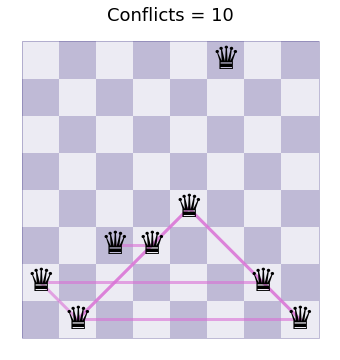

In [3]:
state.plot(show_conflicts=True)

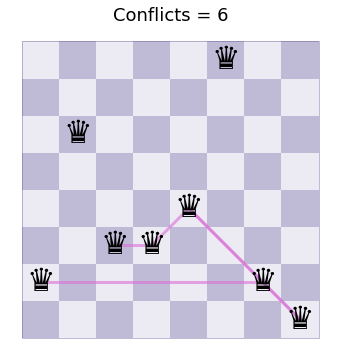

In [4]:
best_neighbor = state.best_neighbor()
best_neighbor.plot(show_conflicts=True)

In [5]:
best_neighbor

NQueensState(queens=[2, 6, 3, 3, 4, 8, 2, 1])

## Hill Climbing
<img src="imgs/hill_climbing.png" width="80%">

In [6]:
class HillClimbing:
    
    def __init__(self):
        self.history = []
        
    def search(self, state, verbose=0):
        current = state
        
        while True:
            if verbose == 1: print(current)
            elif verbose == 2: current.plot(show_conflicts=False)
            elif verbose == 3: current.plot(show_conflicts=True)
            self.history.append(current)

            neighbor = current.best_neighbor()
            if neighbor >= current: return current
            current = neighbor
    
    def __call__(self, state, verbose=0):
        self.search(state, verbose)
        
    def plot_history(self):
        plt.figure(figsize=(12, 4))

        conflicts = [state.conflicts() for state in self.history]
        plt.plot(range(len(conflicts)), conflicts)
        plt.xlabel('Iteration')
        plt.ylabel('Conflicts')
        plt.show()

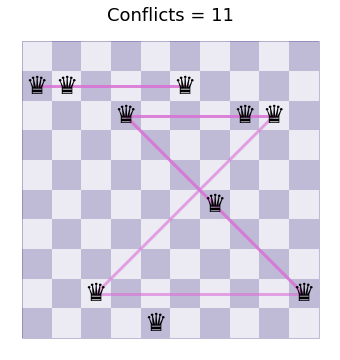

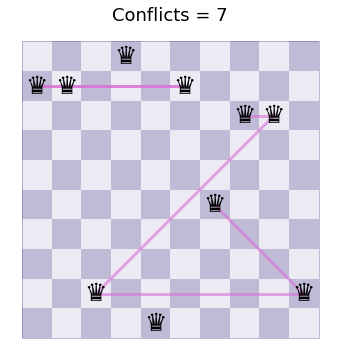

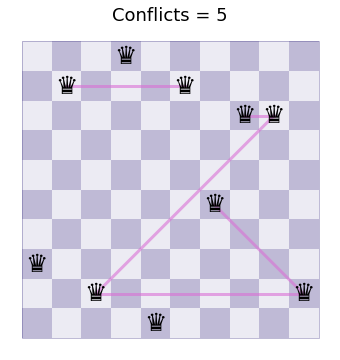

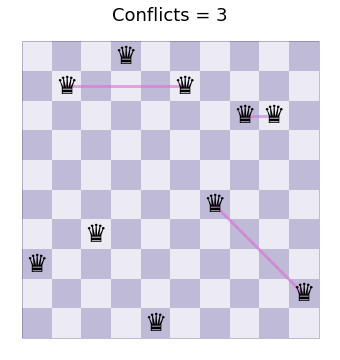

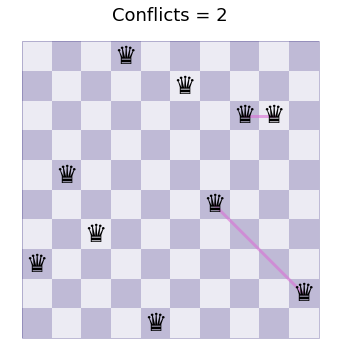

In [7]:
initial_state = NQueensState.random_state(10)

ha = HillClimbing()
solution = ha(initial_state, verbose=3)

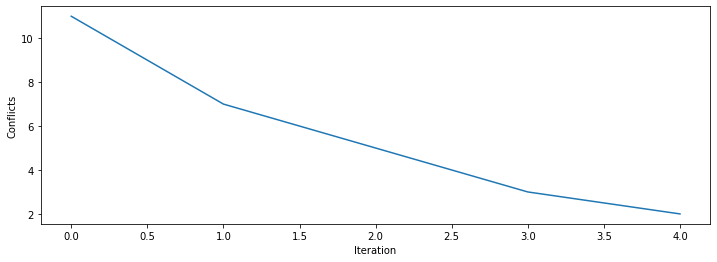

In [8]:
ha.plot_history()

In [9]:
def update_plot(i, show_conflicts):
    width, height = 512, 512
    fc='darkslateblue'
    
    state = ha.history[i - 1]
    N = state.N
    w, h = width // N, height // N

    # draw chess board
    for i in range(N):
        for j in range(N):
            alpha = 0.35 if (i + j) % 2 == 0 else 0.1
            cell = plt.Rectangle((i * w, j * h), w, h, fc=fc, alpha=alpha)
            plt.gca().add_patch(cell)
            
    border = plt.Rectangle((0, 0), N * w, N * h, ec=fc, fc='w', alpha=0.35)
    plt.gca().add_patch(border)

    # show conflicts
    if show_conflicts:
        for i in range(N - 1):
            row_i = state.queens[i]
            for j in range(i + 1, N):
                row_j = state.queens[j]
                if row_i == row_j or abs(row_i - row_j) == j - i:
                    x1, x2 = i * w + w // 2, j * w + w // 2
                    y1, y2 = (row_i - 1) * h + h // 2, (row_j - 1) * h + h // 2
                    line = plt.Line2D((x1, x2), (y1, y2), lw=3, ls='-', color='orchid', alpha=0.6)
                    plt.gca().add_line(line)

    # place queens on chess board
    for col, row in enumerate(state.queens):
        c = 'k' if (col + row) % 2 == 0 else 'w'
        x = col * w + w // 2
        y = (row - 1) * h + h // 2
        fs = w // 2.5
        plt.text(x, y, '♛', color='k', fontsize=fs, ha='center', va='center')

    plt.axis('square')
    plt.axis('off')
    plt.xticks(())
    plt.yticks(())
    plt.title("Conflicts = {}".format(state.conflicts()), fontsize=18)
    plt.show()

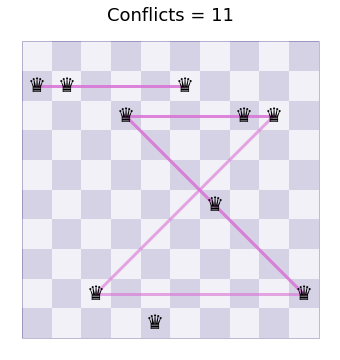

In [10]:
i = widgets.IntSlider(value=1, min=1, max=len(ha.history), description='i:')
show_conflicts = widgets.Checkbox(value=True, description='Show conflicts')

widgets.interact(update_plot, i=i, show_conflicts=show_conflicts);

## Permutation

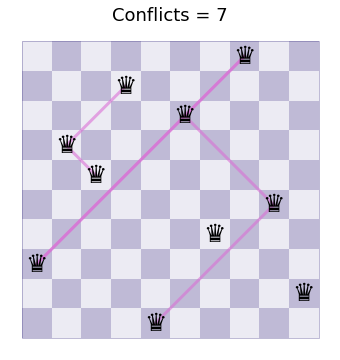

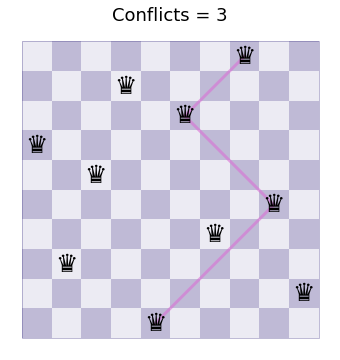

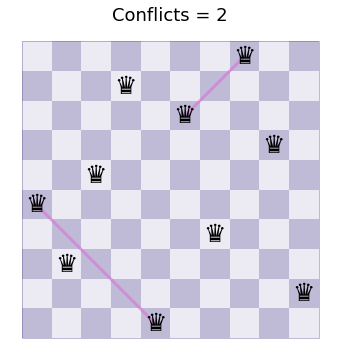

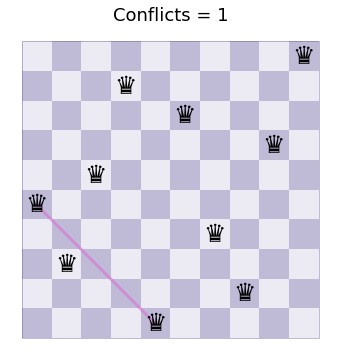

In [11]:
initial_state = NQueensStatePermutation.random_state(N=10)
ha = HillClimbing()

solution = ha(initial_state, verbose=3)

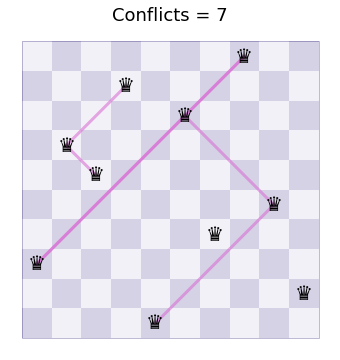

In [12]:
i = widgets.IntSlider(value=1, min=1, max=len(ha.history), description='i:')
show_conflicts = widgets.Checkbox(value=True, description='Show conflicts')

widgets.interact(update_plot, i=i, show_conflicts=show_conflicts);

In [ ]:
## create animation